In [1]:
# 实现的功能：测试数据集

In [1]:
import sys
sys.path.append("/hdd02/zhangyiyang/temporal-shift-module")
import torch
import torchvision
import matplotlib.pyplot as plt
from tsm.dataset import dataset_config, TSNDataSet
from tsm.dataset.weighted_sampler import get_weighted_sampler
from tsm.utils.opts_utils import parser
from tsm.dataset.transforms import GroupMultiScaleCrop, IdentityTransform, Stack, ToTorchFormatTensor, GroupScale, GroupRandomCrop, GroupColorJitter

In [2]:
# 构建数据集

# 设置参数
args = parser.parse_args(['ar', 'RGB', '--use_weighted_sampler', '--num_segments', "3"])
data_length = 1
input_size = 224
num_class, args.train_list, args.val_list, args.root_path, prefix = dataset_config.return_dataset('ar', 'RGB')
train_augmentation = torchvision.transforms.Compose([
    GroupScale(256),
    GroupRandomCrop(224),
    GroupColorJitter(True),
])
normalize = IdentityTransform()

# sampler
sampler = None
if args.use_weighted_sampler:
    sampler = get_weighted_sampler(
        num_class,
        # args.category_weights,
        [0.05, 0.05, 0.2, 0.2, 0.2, 0.2],
        train_file_path=args.train_list,
        num_samples=args.batch_size*args.steps_per_epoch,
        replacement=True,
    )
print(args.category_weights)

# 构建loader
train_loader = torch.utils.data.DataLoader(
    TSNDataSet(
        args.root_path, 
        args.train_list,
        num_segments=args.num_segments,
        new_length=data_length,
        modality=args.modality,
        image_tmpl=prefix,
        transform=torchvision.transforms.Compose([
            train_augmentation,
            Stack(
                roll=(args.arch in ['BNInception', 'InceptionV3'])),
            ToTorchFormatTensor(
                div=(args.arch not in ['BNInception', 'InceptionV3'])),
            normalize,
        ]), dense_sample=args.dense_sample),
    batch_size=16, 
    sampler=sampler,
    shuffle=not args.use_weighted_sampler,
    num_workers=args.workers, pin_memory=True,
    drop_last=True)

ar: 6 classes
[0.5, 0.1, 0.1, 0.1, 0.1, 0.1]
video number:9746


torch.Size([16, 9, 224, 224])
tensor(4)


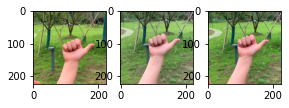

In [12]:
# 测试数据集
cnt = 0
for imgs, target in train_loader:
    sample = imgs[0].numpy().transpose([1, 2, 0])
    print(imgs.shape)
    print(target[0])
    for i in range(3):
        ax = plt.subplot((240+i+ 1))
        ax.imshow(sample[:, :, i*3:(i+1)*3])
    break

In [20]:
# for imgs, target in train_loader:
#     pass

